In [1]:
import pandas as pd
import datetime
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
column_names=['Target','ID','Date','Flag','User','Text']
mp=pd.read_csv('/content/twitter_sentiment_analysis.csv',encoding='latin1',names=column_names)
df=pd.DataFrame(mp)
print(df)

       Target          ID                          Date      Flag  \
0           0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1           0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2           0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3           0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4           0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...       ...         ...                           ...       ...   
84660       0  1753650954  Sun May 10 02:43:10 PDT 2009  NO_QUERY   
84661       0  1753651006  Sun May 10 02:43:12 PDT 2009  NO_QUERY   
84662       0  1753651096  Sun May 10 02:43:13 PDT 2009  NO_QUERY   
84663       0  1753651107  Sun May 10 02:43:14 PDT 2009  NO_QUERY   
84664       0  1753651511  Sun May 10 02:43:22 PDT 2009  NO_QUERY   

                  User                                               Text  
0      _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1        scotthamil

In [4]:
df.dtypes

Target     int64
ID         int64
Date      object
Flag      object
User      object
Text      object
dtype: object

In [5]:
#Displaying the number of rows and columns resepctively
df.shape

(84665, 6)

In [6]:
#Rows start from 0 and end with 21124
df.index

RangeIndex(start=0, stop=84665, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84665 entries, 0 to 84664
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  84665 non-null  int64 
 1   ID      84665 non-null  int64 
 2   Date    84665 non-null  object
 3   Flag    84665 non-null  object
 4   User    84664 non-null  object
 5   Text    84664 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.9+ MB


In [8]:
'''
Target-The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ID- The id of the tweet ( 2087)
Date-the date of the tweet (Sat May 16 23:58:44 UTC 2009)
Flag-The query (lyx). If there is no query, then this value is NO_QUERY
User-the user that tweeted (robotickilldozr)
Text-the text of the tweet (Lyx is cool)
'''
df.columns

Index(['Target', 'ID', 'Date', 'Flag', 'User', 'Text'], dtype='object')

In [9]:
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.query('User=="_TheSpecialOne_" ').count()

Target    1
ID        1
Date      1
Flag      1
User      1
Text      1
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84665 entries, 0 to 84664
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  84665 non-null  int64 
 1   ID      84665 non-null  int64 
 2   Date    84665 non-null  object
 3   Flag    84665 non-null  object
 4   User    84664 non-null  object
 5   Text    84664 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.9+ MB


In [12]:
df.query('Target==0 and User=="mattycus"')


,Target,ID,Date,Flag,User,Text
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
81819,0,1752846262,Sat May 09 23:11:29 PDT 2009,NO_QUERY,mattycus,@jpapciak @Tyler_Lewis I hate the officials so...


In [13]:
df['DateOnly'] = pd.to_datetime(df['Date']).dt.date

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [14]:
df.dtypes

Target       int64
ID           int64
Date        object
Flag        object
User        object
Text        object
DateOnly    object
dtype: object

In [15]:
df.tail()

,Target,ID,Date,Flag,User,Text,DateOnly
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10
84661,0,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,@Trobo1 I wish I'd been at the game.,2009-05-10
84662,0,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10
84663,0,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10
84664,0,1753651511,Sun May 10 02:43:22 PDT 2009,NO_QUERY,NaN,NaN,2009-05-10


In [16]:
df.query('User=="Lindseymw"')

,Target,ID,Date,Flag,User,Text,DateOnly
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10


In [18]:
df['Text']=df['Text'].astype(str)

In [19]:
#clean the text
#Create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Removed @mention
  text=re.sub(r'#','',text)#Removing the '#' symbol
  text=re.sub(r'RT[\s]+','',text)#Removing RT
  text=re.sub(r'https?:\/\/\S+','',text)#Removes the hyperlink

  return text
#Cleaning the text
df['Text']=df['Text'].apply(cleanTxt)

#Show the cleaned text
df

,Target,ID,Date,Flag,User,Text,DateOnly
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...",2009-04-06
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009-04-06
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009-04-06
...,...,...,...,...,...,...,...
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10
84661,0,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,I wish I'd been at the game.,2009-05-10
84662,0,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10
84663,0,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10


In [20]:
#Dropped row with Nan value in Text column
df.dropna(subset=['Text'], inplace=True)

In [21]:
#As can be seen below droppped the last row with Nan value
df.tail()

,Target,ID,Date,Flag,User,Text,DateOnly
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10
84661,0,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,I wish I'd been at the game.,2009-05-10
84662,0,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10
84663,0,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10
84664,0,1753651511,Sun May 10 02:43:22 PDT 2009,NO_QUERY,NaN,nan,2009-05-10


In [22]:
df.drop(['Target'],axis=1)

,ID,Date,Flag,User,Text,DateOnly
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...",2009-04-06
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009-04-06
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009-04-06
...,...,...,...,...,...,...
84660,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10
84661,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,I wish I'd been at the game.,2009-05-10
84662,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10
84663,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10


In [23]:
#Creating a function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
#create tow new columns
df['Subjectivity']=df['Text'].apply(getSubjectivity)
df['Polarity']=df['Text'].apply(getPolarity)
df

,Target,ID,Date,Flag,User,Text,DateOnly,Subjectivity,Polarity
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...",2009-04-06,0.633333,0.216667
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06,0.000000,0.000000
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009-04-06,0.500000,0.500000
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06,0.400000,0.200000
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009-04-06,1.000000,-0.625000
...,...,...,...,...,...,...,...,...,...
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10,0.800000,-0.600000
84661,0,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,I wish I'd been at the game.,2009-05-10,0.400000,-0.400000
84662,0,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10,0.000000,0.000000
84663,0,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10,0.528571,-0.257143


In [24]:
df.groupby(df['DateOnly']).size()

DateOnly
2009-04-06     1426
2009-04-07     7149
2009-04-17     1244
2009-04-18     9040
2009-04-19    11427
2009-04-20     7817
2009-04-21     3504
2009-05-01     3254
2009-05-02    11398
2009-05-03    14779
2009-05-04     6438
2009-05-09     4997
2009-05-10     2192
dtype: int64

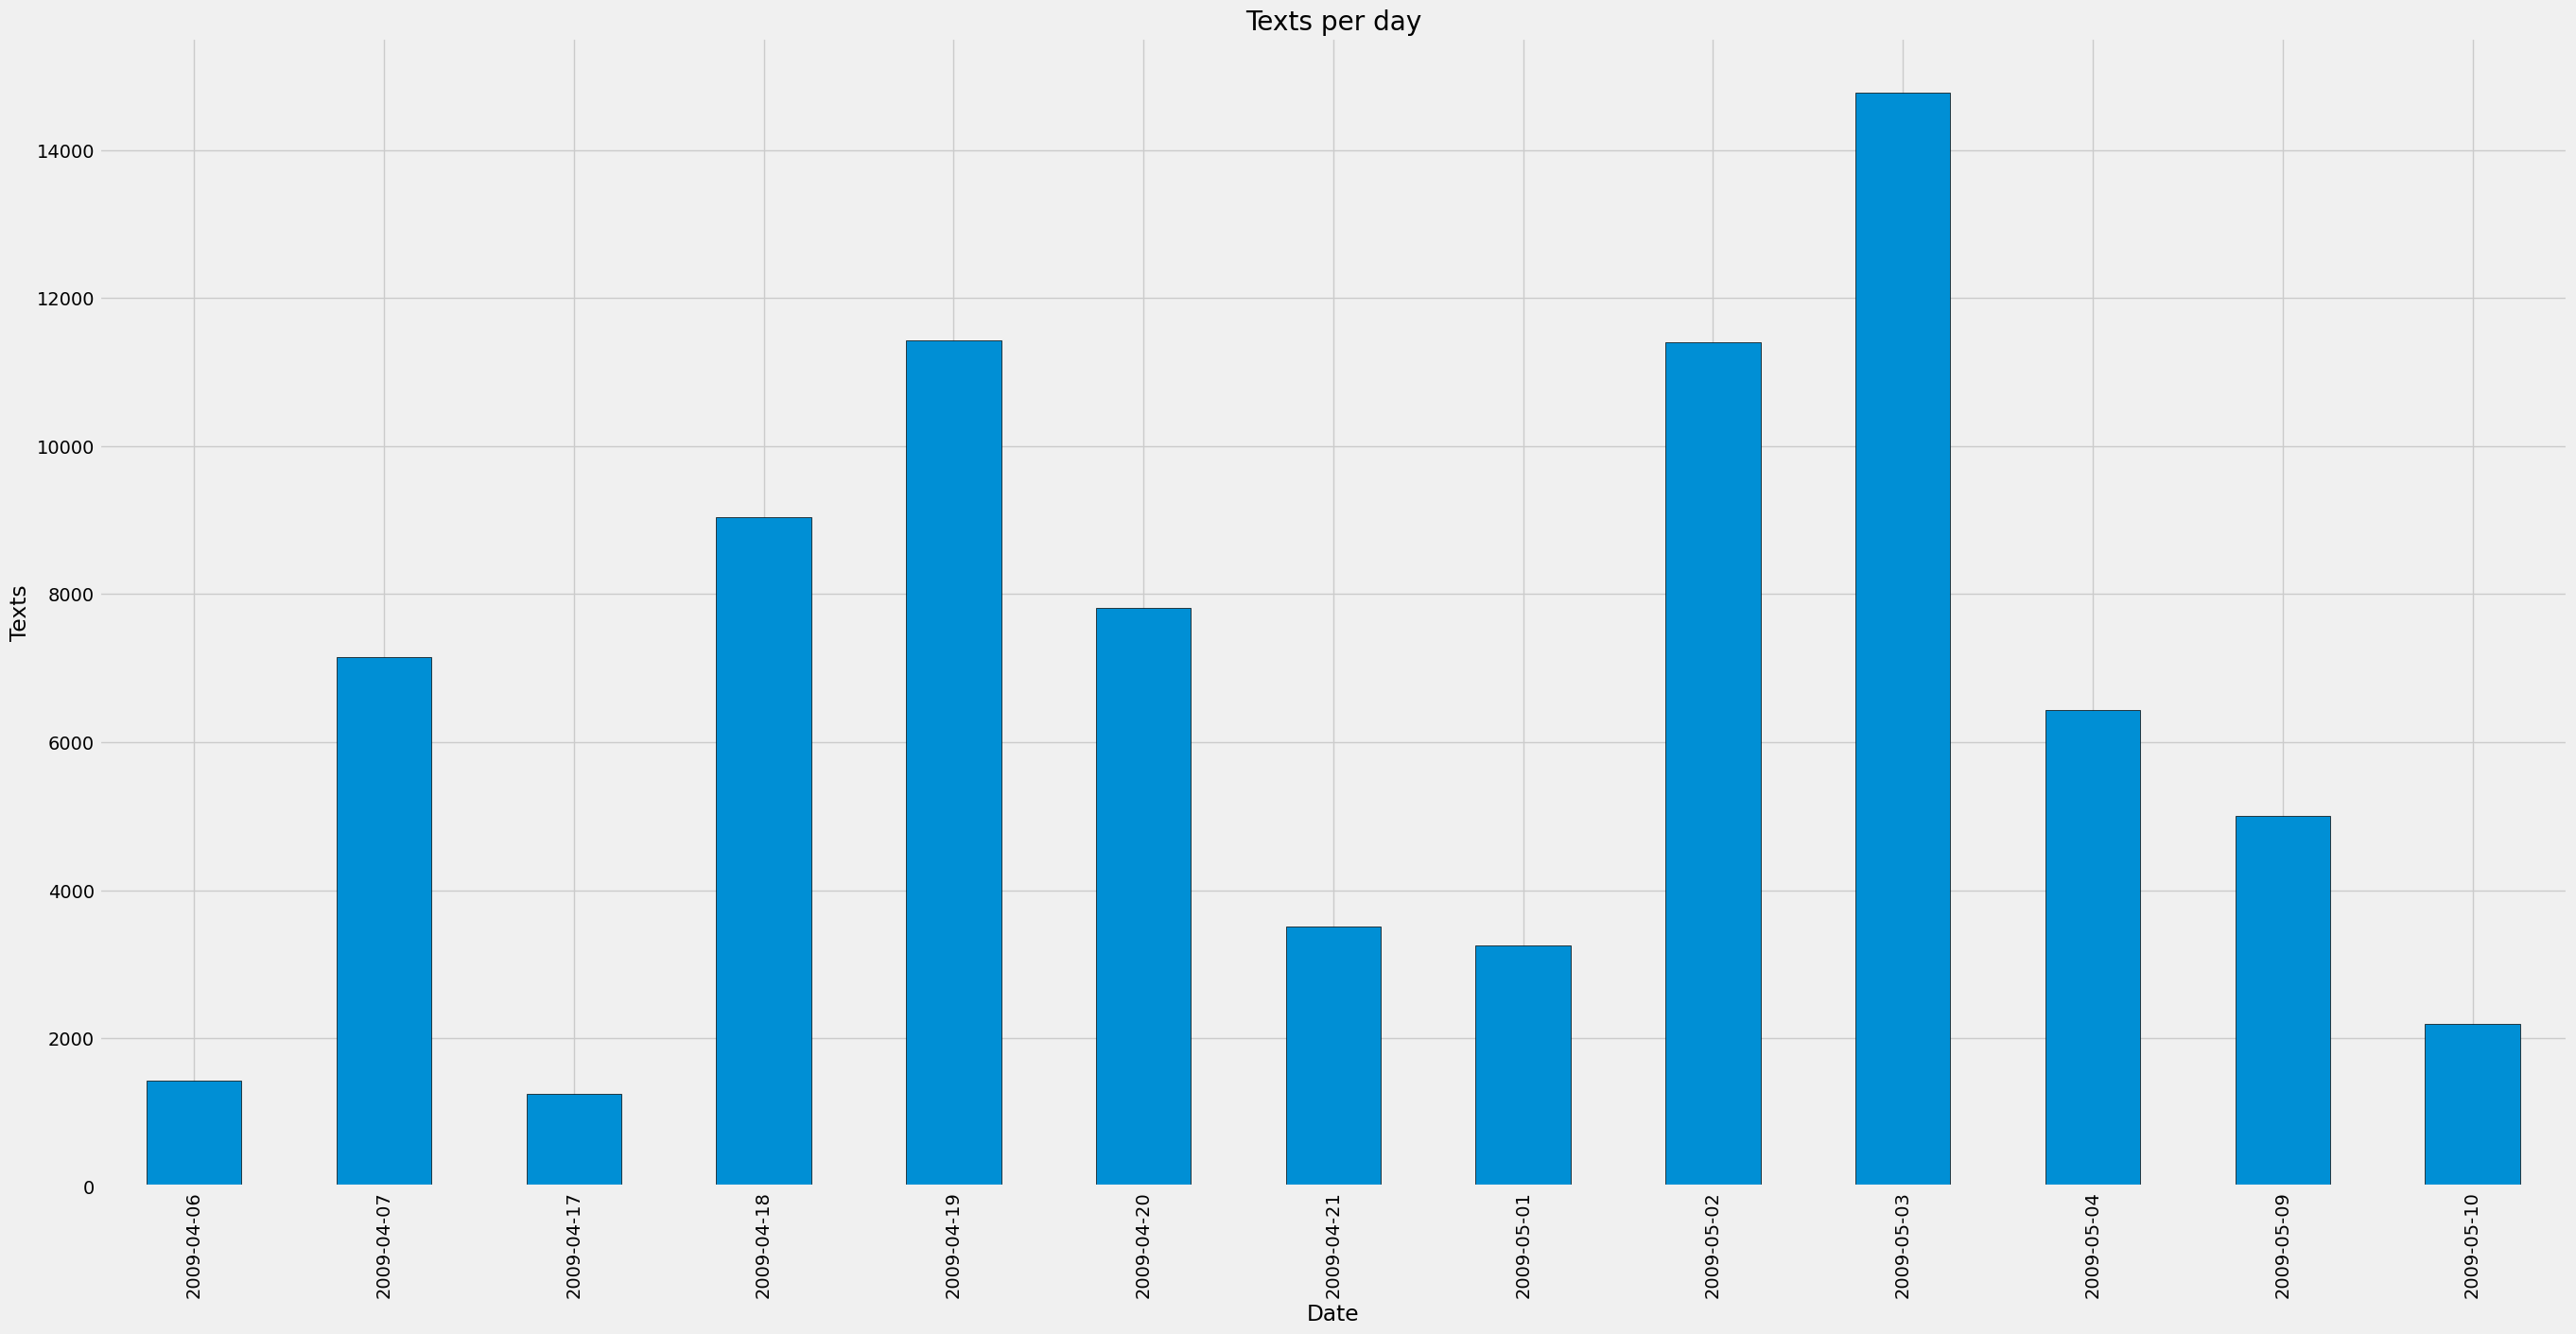

In [25]:
df['DateOnly'] = pd.to_datetime(df['DateOnly'])
df['DateOnly'] = df['DateOnly'].dt.date

# Group by 'DateOnly' and count the number of occurrences of 'Text'
text_per_day = df.groupby('DateOnly').size()
plt.figure(figsize=(30,15))
# Plotting the bar chart
text_per_day.plot(kind='bar', edgecolor='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Texts')
plt.title('Texts per day')

# Display the plot
plt.show()

In [26]:
#User with the most number of tweets
df['User'].value_counts()


tweetpet         310
nuttychris        74
sebby_peek        51
amazingphoebe     36
Dogbook           34
                ... 
crystalgo          1
zachh8526          1
ktelwood           1
mendezfx           1
4freepeople        1
Name: User, Length: 67160, dtype: int64

In [27]:
df['User'].value_counts().tail()

crystalgo      1
zachh8526      1
ktelwood       1
mendezfx       1
4freepeople    1
Name: User, dtype: int64

In [28]:
#Displaying the name of user with the most no. of tweets
user_with_max_tweets = df['User'].value_counts().idxmax()

print("User with the maximum number of tweets:", user_with_max_tweets)

User with the maximum number of tweets: tweetpet


In [29]:
#Displaying the name of user with the least  no. of tweets
user_with_min_tweets = df['User'].value_counts().idxmin()

print("User with the minimum number of tweets:", user_with_min_tweets)

User with the minimum number of tweets: AngMoGirl


In [30]:
df[df['User']=='AngMoGirl']

,Target,ID,Date,Flag,User,Text,DateOnly,Subjectivity,Polarity
58286,0,1685865519,Sun May 03 02:29:46 PDT 2009,NO_QUERY,AngMoGirl,"Ah, I've heard a lot about Timbre but never h...",2009-05-03,0.0,0.0


In [31]:
df[('DateOnly')].head()

0    2009-04-06
1    2009-04-06
2    2009-04-06
3    2009-04-06
4    2009-04-06
Name: DateOnly, dtype: object

In [32]:
#Mean of the Subjectivity and Polarity of tweets
yo=df['Subjectivity'].mean()
oy=df['Polarity'].mean()
print("Mean Subjectivity:",yo)
print("Mean Polarity:",oy)

Mean Subjectivity: 0.38976474582286097
Mean Polarity: -0.00817930019346955


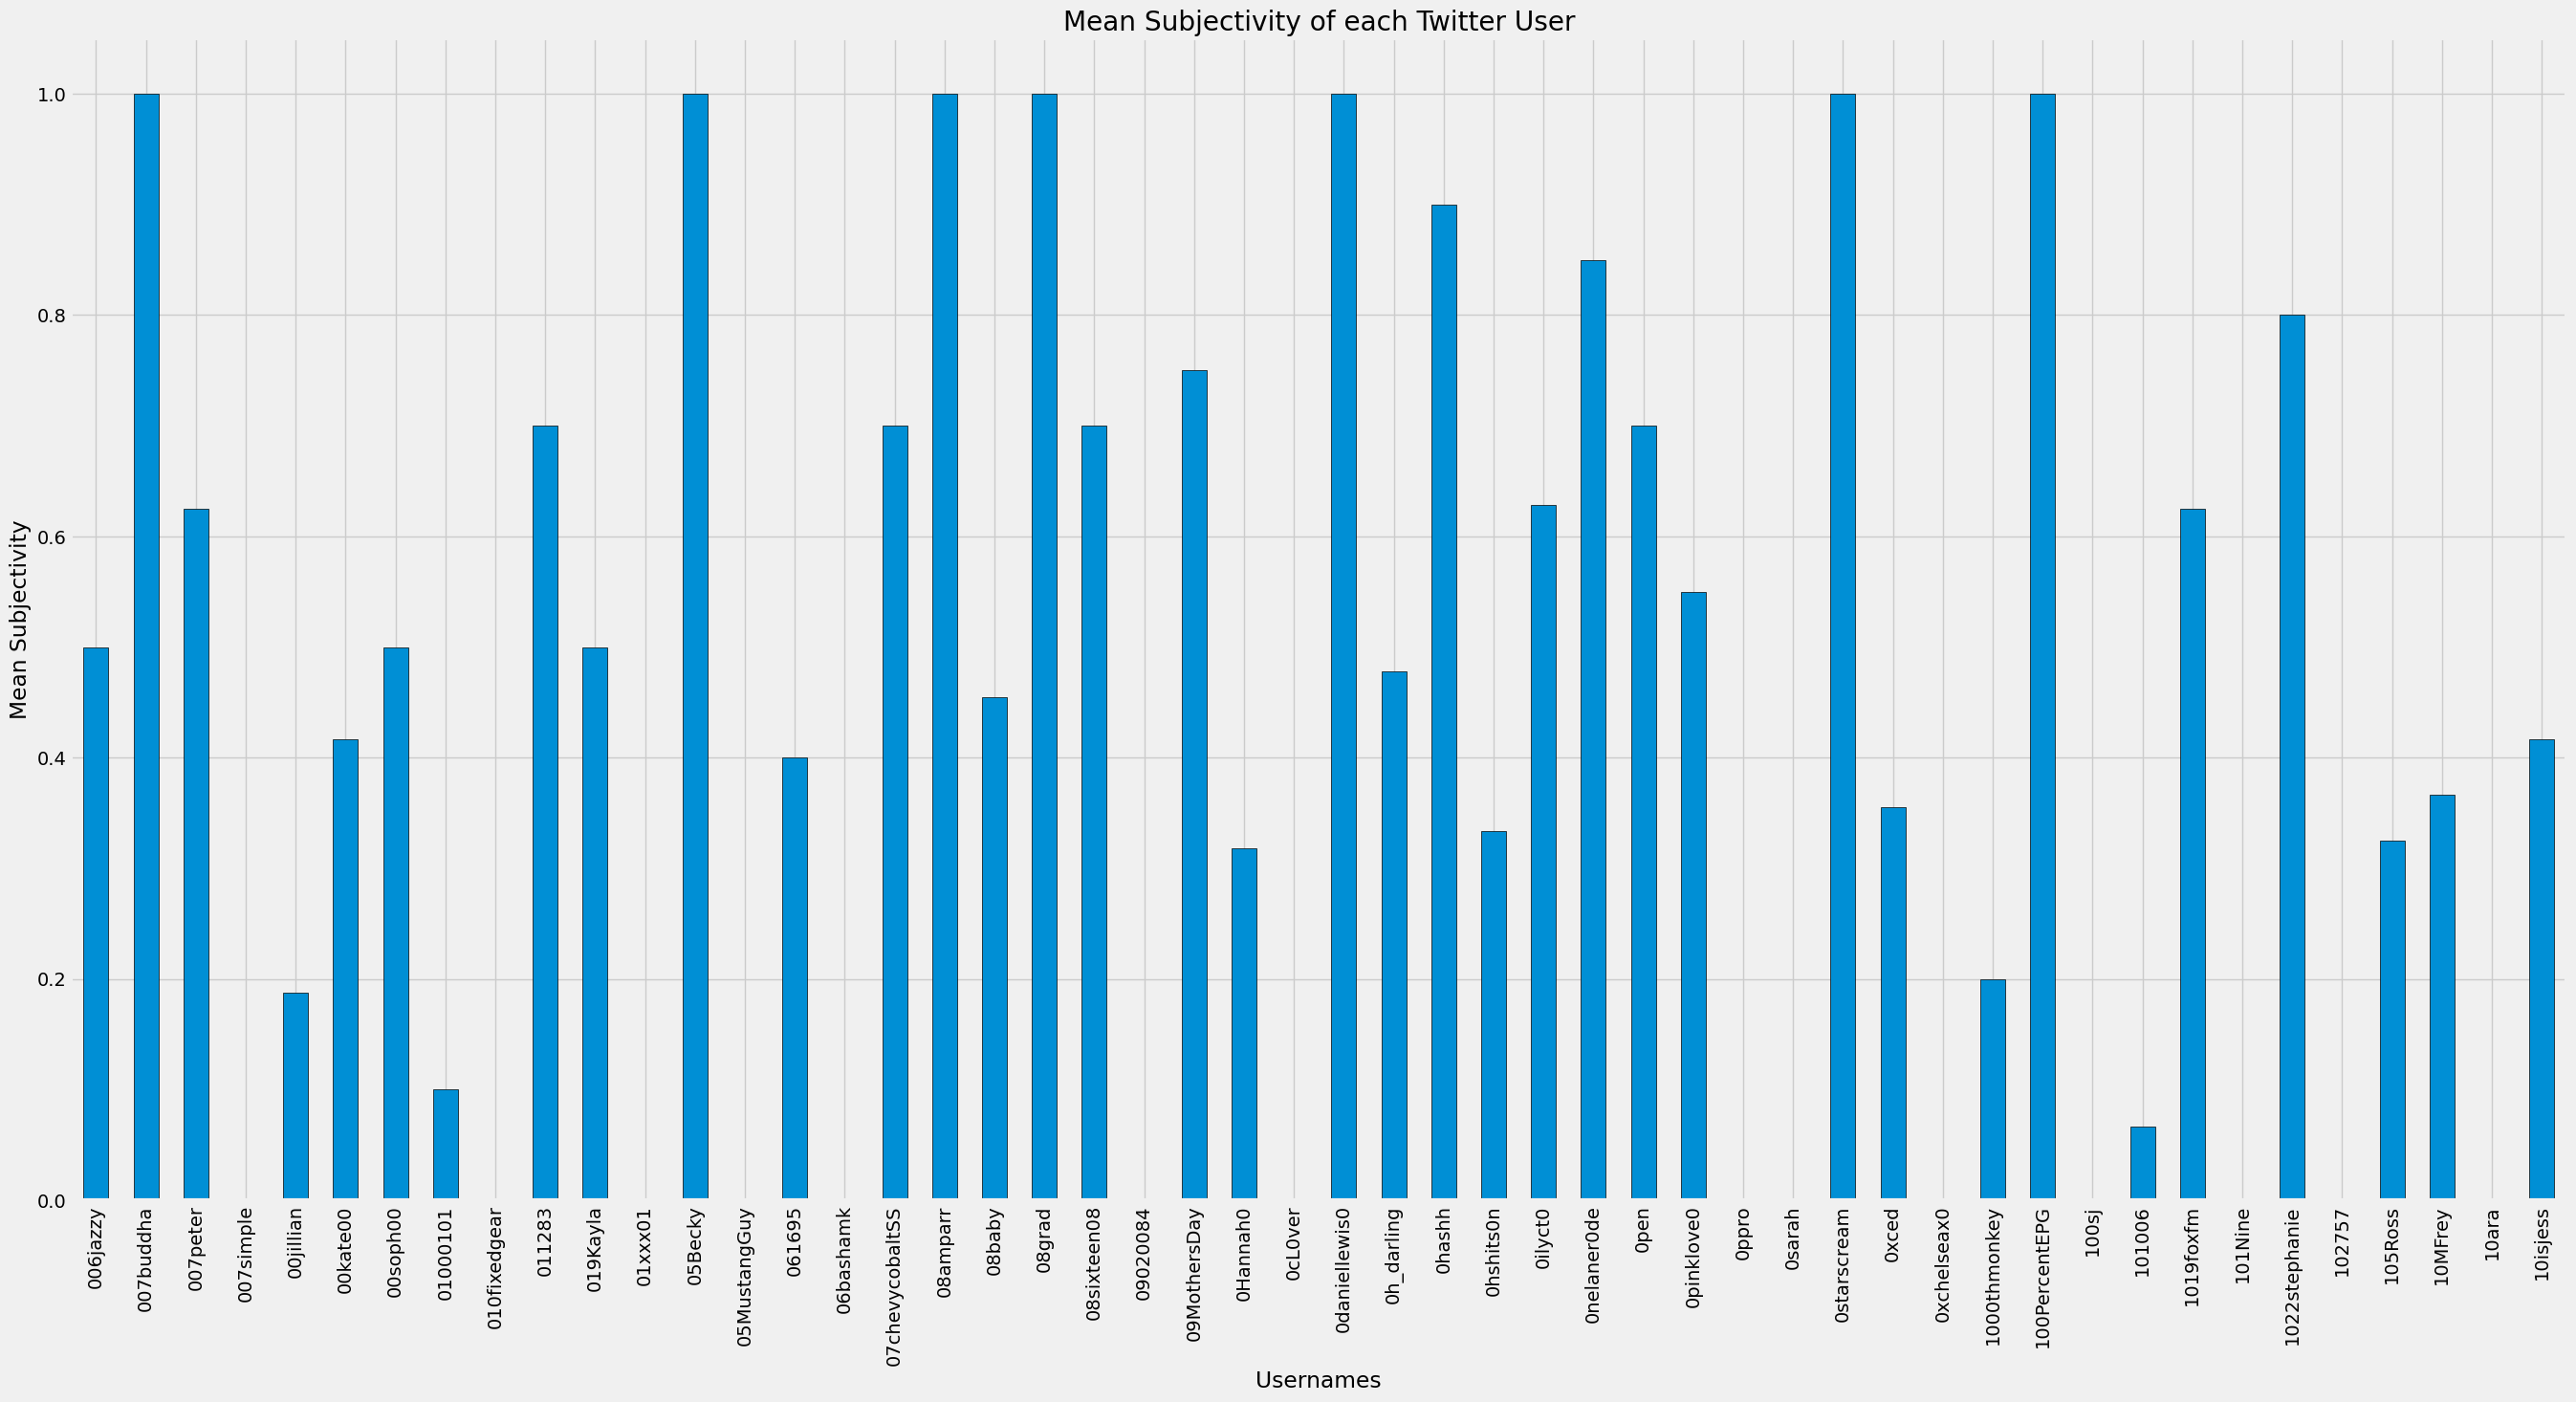

In [33]:
lp = df.groupby('User')['Subjectivity'].mean().head(50)
plt.figure(figsize=(30, 15))
# Plotting a bar graph to show each user against their mean subjectivity,considering only first 50 users since all users will be too many
lp.plot(kind='bar', edgecolor='black')

# Adding labels and title
plt.xlabel('Usernames')
plt.ylabel('Mean Subjectivity')
plt.title('Mean Subjectivity of each Twitter User')

# Displaying the plot
plt.show()

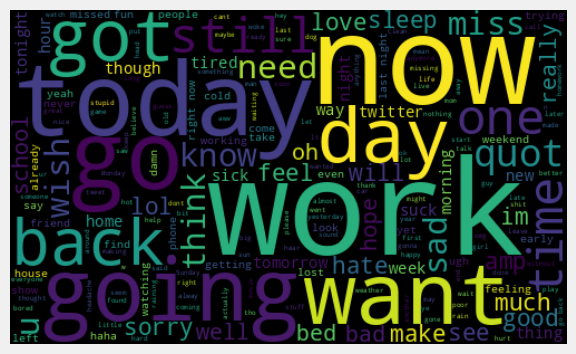

In [34]:
#plot the word cloud
#It shows the most commonly used words as the largest ones /in large font sizes
allWords = ''.join([twts for twts in df['Text']])
wordCloud =WordCloud(width = 500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()
#From the image we can infer that 'going','work' ,'now','want' are the three most commonly used words in tweets

In [35]:
#Create a function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,Target,ID,Date,Flag,User,Text,DateOnly,Subjectivity,Polarity,Analysis
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...",2009-04-06,0.633333,0.216667,Positive
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06,0.000000,0.000000,Neutral
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,2009-04-06,0.500000,0.500000,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06,0.400000,0.200000,Positive
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",2009-04-06,1.000000,-0.625000,Negative
...,...,...,...,...,...,...,...,...,...,...
84660,0,1753650954,Sun May 10 02:43:10 PDT 2009,NO_QUERY,Lindseymw,Just got pulled over on 36. I am fucking terri...,2009-05-10,0.800000,-0.600000,Negative
84661,0,1753651006,Sun May 10 02:43:12 PDT 2009,NO_QUERY,Lutzee,I wish I'd been at the game.,2009-05-10,0.400000,-0.400000,Negative
84662,0,1753651096,Sun May 10 02:43:13 PDT 2009,NO_QUERY,alykillen,wishing i had a time controller so that i coul...,2009-05-10,0.000000,0.000000,Neutral
84663,0,1753651107,Sun May 10 02:43:14 PDT 2009,NO_QUERY,4freepeople,Mom is sick. She has dizzy spells. Can't move....,2009-05-10,0.528571,-0.257143,Negative


In [36]:
#print all the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i]=='Positive':
    print(str(j)+')'+sortedDF['Text'][i])
    print()
    j=j+1


Streaming output truncated to the last 5000 lines.
24450) stop enjoying the rain!!! It's sticking around because of you 

24451)sooooooo close to a 4 on the bio test..but so far away! 

24452)Good Morning... Just saw on the news theres an accident on 101   its gonna take me FOREVER to get to work

24453)just got a report that Ari officially crawled for the first time at around 9:15 this morning . . . and I'm at school taking a final 

24454)good friend and great lawyer b. michaels was my 300th follower...too bad the majority of the group are spamers 

24455)Early. Morning. 

24456) can you make one more 50 things kit for me? :p jk - i finally get the money and its sold out  lol

24457)Urrrrgh couldn't sleep  dreaming about work...was way too busy!!! lol

24458) I'll keep u posted on the events so u can rock your new Jimmy Choo shoes lol. Gotta get used to not seeing u on wknds no more 

24459)Why do mondays always feel so much longer than other days even though we get out early? probab

In [37]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i]=='Negative':
    print(str(j)+')'+sortedDF['Text'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
24006) Oh COFFEE! Whoops! I missed that part! I'm sorry. Thought you were talking perfumes! My bad 

24007)I hate the rain 

24008)it's never a good sign when you have to spend 20 mins troubleshooting just to get your laptop to boot on a Monday morning.  

24009)I survived a whole weekend without him.  But it was hard.  What will i do when he leaves for school?  

24010)Why are all the other races in Civilization always so aggressive 

24011) ewww, that stinks. I've spent so much time and energy to build that network. 520 friends, and all but 20 are &quot;real&quot; friends. 

24012) When I clicked on that link, I expected to see a picture of myself or my Facebook...something. 

24013)xmen origins was a big disappointment in my book :| saw the leaked version and the theatrical release. too cliche, script was cheesy 

24014) I wish I could eat mcdonalds everyday and not get fat... 

24015)work, work , work. it never stops.... how long u

In [38]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Text']
round((ptweets.shape[0]/df.shape[0])*100,1)

31.8

In [39]:
#get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Text']
round((ntweets.shape[0]/df.shape[0]*100),1)

31.3

In [40]:
#get the percentage of Neutral tweets
ntweets=df[df.Analysis=='Neutral']
ntweets=ntweets['Text']
round((ntweets.shape[0]/df.shape[0]*100),1)

36.9

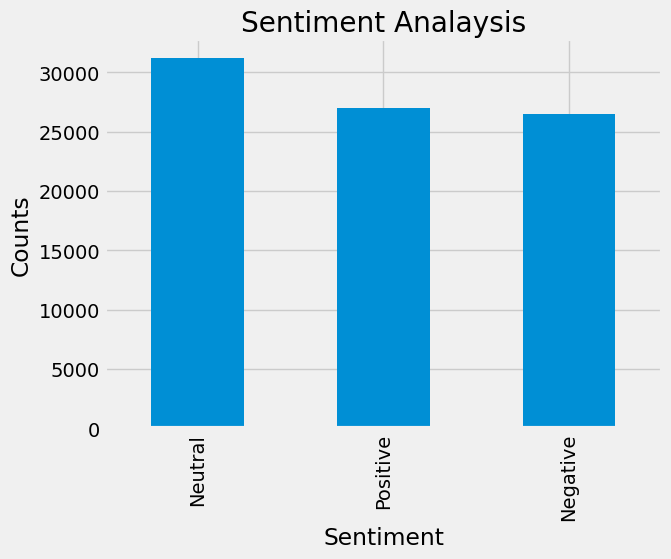

In [41]:
#Show thee value counts
df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()